# BASKETBALL STATS PROJECT

Creates a data dictionary that maps each team to its symbol. Will be used to join data files together. 

In [1]:
import pandas as pd
import numpy as np

testDict = {}

def createDict():
    testDict["Atlanta Hawks"] = "ATL"
    testDict["Brooklyn Nets"] = "BRK"
    testDict["Boston Celtics"] = "BOS"
    testDict["Charlotte Hornets"] = "CHO"
    testDict["Chicago Bulls"] = "CHI"
    testDict["Cleveland Cavaliers"] = "CLE"
    testDict["Dallas Mavericks"] = "DAL"
    testDict["Denver Nuggets"] = "DEN"
    testDict["Detroit Pistons"] = "DET"
    testDict["Golden State Warriors"] = "GSW"
    testDict["Houston Rockets"] = "HOU"
    testDict["Indiana Pacers"] = "IND"
    testDict["Los Angeles Clippers"] = "LAC"
    testDict["Los Angeles Lakers"] = "LAL"
    testDict["Memphis Grizzlies"] = "MEM"
    testDict["Miami Heat"] = "MIA"
    testDict["Milwaukee Bucks"] = "MIL"
    testDict["Minnesota Timberwolves"] = "MIN"
    testDict["New Orleans Pelicans"] = "NOP"
    testDict["New York Knicks"] = "NYK"
    testDict["Oklahoma City Thunder"] = "OKC"
    testDict["Orlando Magic"] = "ORL"
    testDict["Philadelphia 76ers"] = "PHI"
    testDict["Phoenix Suns"] = "PHO"
    testDict["Portland Trail Blazers"] = "POR"
    testDict["Sacramento Kings"] = "SAC"
    testDict["San Antonio Spurs"] = "SAS"
    testDict["Toronto Raptors"] = "TOR"
    testDict["Utah Jazz"] = "UTA"
    testDict["Washington Wizards"] = "WAS"
    testDict["Charlotte Bobcats"] = "CHA"
    testDict["New Orleans Hornets"] = "NOH"
    testDict["New Jersey Nets"] = "NJN"
    testDict["Seattle SuperSonics"] = "SEA"
    testDict["Vancouver Grizzlies"] = "VAN"
    testDict["New Orleans/Oklahoma City Hornets"] = "NOK"

createDict()

Function for inputting data for various team related files. Formats and cleans each file. 

In [2]:
def inputData(stats, n): # n = 0 - team rankings, 1 - team per game stats, 2 - opposing team per game stats
                          # 3 - misc stats
    counter = 0
    frames = []
    for item in stats:
        a = pd.read_csv(item)
        if n >= 0 and n <= 3:
            if n == 0:  #delete first row of team rankings dataframe
                a = a.iloc[1:, 0:5]        
                a.columns = ['Rk', 'Team', 'Conf', 'Div', 'W'] #relabel columns
            elif n >= 1 and n <= 3:
                if n == 3:
                    a = a.iloc[1:31, 0:24] #delete first row of misc stats dataframe
                    a.columns = ['Rk', 'Team', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'oeFG%' ,'oTOV%', 'DRB%', 'oFT/FGA']
                else:
                    a = a[:30] #using rows 0-29
                    a = a.iloc[:, 0:25]
                    if 'PTS\\' in a: #cleaning columns that have '\' in them
                        a['PTS'] = a['PTS\\']
                        a = a.drop(['PTS\\'], axis = 1)
                        a['PTS'] = a['PTS'].astype(str)
                        a['PTS'] = [s.replace('\\', '') for s in a['PTS']]
                        a['PTS'] = a['PTS'].astype(float)
                    if n == 2:
                        a.columns = ['oRk', 'Team', 'G', 'MP', 'oFG', 'oFGA', 'oFG%', 'o3P', 'o3PA', 'o3P%', 'o2P', 'o2PA', 'o2P%', 'oFT', 'oFTA', 'oFT%', 'oORB', 'oDRB', 'oTRB', 'oAST', 'oSTL', 'oBLK', 'oTOV', 'oPF', 'oPTS']
                        #labels for opponent stats
                a['Team'] = a['Team'].astype(str)
                a['Team'] = [s.replace('*', '') for s in a['Team']]
            #print(a)
            a = a.dropna(axis = 0, how = 'any')
            #print(a)
            a["Tm"] = a.apply(lambda x: testDict[str(x.Team)], axis = 1)
        a["TMYR"] = a.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        if n > 3:
            a['PYT'] = a.apply(lambda x: str(x.Player) + str(x.Tm) + str(counter), axis = 1)
        if n == 0:
            a = a[["TMYR", "W"]]
        #print(a)
        counter = counter + 1;
        frames.append(a)
    result = pd.concat(frames, sort = False)
    return result

20 years of team points per game, opposing team points per game, and miscellaneous team stats per game. 

In [3]:
teamPGVars = ['teamPG99.csv','teamPG00.csv','teamPG01.csv','teamPG02.csv','teamPG03.csv','teamPG04.csv','teamPG05.csv','teamPG06.csv','teamPG07.csv','teamPG08.csv','teamPG09.csv', 'teamPG10.csv', 'teamPG11.csv' , 'teamPG12.csv', 'teamPG13.csv', 'teamPG14.csv', 'teamPG15.csv',  'teamPG16.csv', 'teamPG17.csv', 'teamPG18.csv']

oTeamPG = ['oTeamPG99.csv', 'oTeamPG00.csv','oTeamPG01.csv','oTeamPG02.csv','oTeamPG03.csv','oTeamPG04.csv','oTeamPG05.csv','oTeamPG06.csv', 'oTeamPG07.csv', 'oTeamPG08.csv', 'oTeamPG09.csv', 'oTeamPG10.csv', 'oTeamPG11.csv', 'oTeamPG12.csv', 'oTeamPG13.csv' , 'oTeamPG14.csv' , 'oTeamPG15.csv' , 'oTeamPG16.csv', 'oTeamPG17.csv', 'oTeamPG18.csv']
miscData = ['miscStats99.csv','miscStats00.csv','miscStats01.csv','miscStats02.csv','miscStats03.csv','miscStats04.csv','miscStats05.csv','miscStats06.csv','miscStats07.csv','miscStats08.csv','miscStats09.csv', 'miscStats10.csv', 'miscStats11.csv', 'miscStats12.csv', 'miscStats13.csv', 'miscStats14.csv', 'miscStats15.csv', 'miscStats16.csv', 'miscStats17.csv', 'miscStats18.csv']

In [4]:
teamPG1 = inputData(teamPGVars, 1)

In [5]:
teamPG1.to_csv('teamPGstats.csv')

In [6]:
oTeamPG1 = inputData(oTeamPG, 2)

In [7]:
oTeamPG1.to_csv('oTeamPGStats.csv')

In [8]:
miscData1 = inputData(miscData, 3)

In [9]:
miscData1.to_csv('miscDataStats.csv')

merges all team data files, converts miscellaneous data into float format

In [10]:
result1 = pd.merge(oTeamPG1, teamPG1, on = 'TMYR')

In [11]:
for col in miscData1.columns:
    if col != 'Rk' and col != 'Tm' and col != 'Team' and col != 'TMYR':
        miscData1[col] = miscData1[col].astype(float)

In [12]:
result2 = pd.merge(result1, miscData1, on = 'TMYR')

In [13]:
result2['SRS'] = result2['SRS'].astype(float)

We can see that team stats like TS% and FG% correleate with the Simple Rating System (SRS) score of a team. The SRS score takes into account the general strength of a team's opponents AND the average point differential (margin of victory). A rating of 0 is considered average; the SRS score measures how far above each team is from average. It is therefore a more accurate indicator of a team's strength than just the team's number of wins. We will explore this later in the project. 

In [14]:
result2.corr()['SRS']

oRk       -0.532371
G_x       -0.000181
MP_x      -0.034672
oFG       -0.335167
oFGA       0.019263
oFG%      -0.600366
o3P       -0.128588
o3PA      -0.054316
o3P%      -0.454784
o2P       -0.284023
o2PA       0.078940
o2P%      -0.479679
oFT       -0.284346
oFTA      -0.260493
oFT%      -0.127120
oORB      -0.062620
oDRB      -0.290639
oTRB      -0.315273
oAST      -0.511497
oSTL      -0.270042
oBLK      -0.432016
oTOV       0.069604
oPF        0.141984
oPTS      -0.406248
Rk_x      -0.510599
G_y       -0.000181
MP_y      -0.034672
FG         0.338684
FGA       -0.079078
FG%        0.599816
             ...   
DRB        0.381787
TRB        0.268663
AST        0.381879
STL        0.154848
BLK        0.271394
TOV       -0.344197
PF        -0.223336
PTS        0.407353
Age        0.483883
W          0.919663
L         -0.919685
PW         0.943667
PL        -0.941386
MOV        0.996195
SOS       -0.241646
SRS        1.000000
ORtg       0.678707
DRtg      -0.613110
Pace      -0.050270


Importing the neccesary libraries for the modified_input_data function. Urls of the webpages to scrape from are listed below. urls = 30 years of data, urls2 = 2 years of data, urls3 = 20 years of data. All data is of advanced player stats. 

In [15]:
import seaborn as sns 
from urllib.request import urlopen
from bs4 import BeautifulSoup




In [16]:
urls = ["https://www.basketball-reference.com/leagues/NBA_1989_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1990_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1991_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1992_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1993_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1994_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1995_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1996_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1997_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1998_advanced.html", "https://www.basketball-reference.com/leagues/NBA_1999_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2000_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2001_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2002_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2003_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2004_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2005_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2006_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2007_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2008_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2009_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2010_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2011_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2012_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2013_advanced.html","https://www.basketball-reference.com/leagues/NBA_2014_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2015_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2016_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2017_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2018_advanced.html" ]
urls2 = ["https://www.basketball-reference.com/leagues/NBA_2017_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2018_advanced.html"]
urls3 = ["https://www.basketball-reference.com/leagues/NBA_1999_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2000_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2001_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2002_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2003_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2004_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2005_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2006_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2007_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2008_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2009_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2010_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2011_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2012_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2013_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2014_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2015_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2016_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2017_advanced.html", "https://www.basketball-reference.com/leagues/NBA_2018_advanced.html"]


function for inputting advanced player data. scrapes data from webpages containing advanced player stats in table form, places data in a DataFrame. argument is for url of all webpages to scrape from. We don't need to download .csv files of the data because the web scraper formats the data into pandas DataFrames for us. 

In [17]:
def modified_input_data(urls):
    
    
    header = []
    frames = []
    final = []
    html = urlopen(urls[0])
    soup = BeautifulSoup(html, 'lxml')
    col_labels = soup.find_all('th')
    col_str = str(col_labels)
    cleanheader = BeautifulSoup(col_str, 'lxml').get_text()
    header.append(cleanheader)
    headerFrame = pd.DataFrame(header)
    hF = headerFrame[0].str.split(',', expand = True) 
    hF = hF.iloc[:,1:29]
    hF.columns = range(0, 28)
    
    
    counter = 0
    for url in urls:
        frames = [hF]
        html = urlopen(url)
        soup = BeautifulSoup(html, 'lxml')
        rows = soup.find_all('tr')
        
        list_all = []
        for row in rows:
            row_td = row.find_all('td')
            str_cells = str(row_td)
            cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
            list_all.append(cleantext)
        df = pd.DataFrame(list_all)
        df = df[0].str.split(',', expand = True)
        df = df.iloc[:, 0:28]
        frames.append(df)
        df2 = pd.concat(frames)
        df2 = df2.rename(columns = df2.iloc[0])
        df2 = df2.drop(df2.index[0])
        df2 = df2.dropna(axis = 0, how = 'any')
        
        df2['YR'] = df2.apply(lambda x: str(counter), axis = 1)
        #print(df2.columns)
        #df["TMYR"] = df.apply(lambda x: str(x.Tm) + str(counter), axis = 1)
        #df['PYT'] = df.apply(lambda x: str(x.Player) + str(x.Tm) + str(counter), axis = 1)
        
        
        
        counter = counter + 1
        final.append(df2)
    
    df3 = pd.concat(final)
    df3['TMYR'] = df3.apply(lambda x: x[' Tm'] + x.YR, axis = 1)
    #print(df3)
    df3[' VORP'] = df3[' VORP'].str.strip(']')
    #df3.to_csv('fra.csv')
    
    
    
    
    return df3

Function for filtering the advanced player stats. Cleans data further, converts each column stat (such as ORB%) into float form. Players must have played in a minimum of 10 games to qualify for a season. Filters data so that only players in the 95 percentile of VORP (This stat is explained in the README) are included - only the 'star' players remain. Groups players by team and year, adds up total for each statistical category. For example, if two basketball players from the same year and team both meet the minimum threshold for VORP, we add together their respective stats and group that value for that same year and team. 

In [18]:
def filterData(urls, percent):
    apData = modified_input_data(urls)
    apData = apData.fillna(0)
    apData = apData[apData[' Player'] != "[Walt Lemon"] 
    apData[' G'] = apData[' G'].astype(float)
    apData = apData[apData[' G'] >= 10]
    
    
    for col in apData.columns:
        if col == ' TS%' or col == ' PER' or col == ' 3PAr' or col == ' FTr' or col == ' ORB%' or col == ' DRB%' or col == ' TRB%' or col == ' AST%' or col == ' STL%' or col == ' BLK%' or col == ' TOV%' or col == ' USG%' or col == ' OWS' or col == ' DWS' or col == ' WS' or col == ' WS/48' or col == ' OBPM' or col == ' DBPM' or col == ' BPM' or col == ' VORP':
            #print(col)
            apData[col] = apData[col].astype(float)
    
    apData = apData[apData[' Tm'] != 'TOT']
    apData['TMYR'] = apData['TMYR'].str.strip()
    
    
   
    #reset index for dropping a row
    #g = df.shape[0]
    #for i in range(0, g):
        #if i < g-1 and (df.iloc[i,1] == df.iloc[i + 1, 1]):
            #if(df.iloc[i, 1] > df.iloc[i+1, 1]):
                #df.iat[i, 28] = df.iat[i+1, 28] + df.iat[i, 28]
                #df.iat[i + 1, 28] = -10
                #temp = df[i + 1, :]
                #df.iloc[i + 1,:] = df.iloc[i, :].values
                #df.iloc[i,:] = temp.values
            #else:
                #df.iat[i + 1, 28] = df.iat[i+1, 28] + df.iat[i, 28]
                #df.iat[i, 28] = -10
    
    p = np.percentile(apData[' VORP'], percent)
    apData = apData[apData[' VORP'] >= p]
    #print(df)
    s = apData.groupby(['TMYR']).sum().reset_index()
    s.to_csv('advanced_player_data_sums.csv') #check to make sure this worked
    return s

Call filterData function with 20 years of advanced player stat urls, and we look for players in the 95th percentile of VORP over the years. 

In [19]:
aData = filterData(urls3, 95)

In [20]:
aData


,TMYR,G,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,ATL1,82.0,19.4,0.621,0.000,0.735,11.2,31.3,21.2,5.4,...,18.7,13.8,5.6,4.3,9.9,0.160,-0.4,3.2,2.8,3.6
1,ATL11,162.0,40.4,1.130,0.008,0.741,18.6,43.1,30.7,29.4,...,25.5,39.8,11.1,9.0,20.2,0.338,2.7,6.2,8.8,9.2
2,ATL12,154.0,39.9,1.127,0.152,0.508,14.4,47.4,31.0,34.6,...,24.9,44.4,8.3,8.2,16.5,0.295,2.2,5.4,7.5,7.8
3,ATL13,66.0,21.1,0.499,0.099,0.292,6.9,24.8,15.9,20.6,...,11.7,28.4,1.9,4.9,6.8,0.139,0.3,3.7,4.1,3.5
4,ATL14,74.0,19.8,0.560,0.006,0.196,8.2,23.0,15.7,15.3,...,11.3,21.8,4.7,4.1,8.8,0.153,0.7,2.4,3.1,3.5
5,ATL16,224.0,56.2,1.827,1.017,0.705,14.3,53.1,34.2,46.1,...,36.3,60.4,14.1,10.3,24.5,0.493,6.0,5.3,11.3,10.4
6,ATL17,163.0,40.7,1.121,0.462,0.506,14.7,39.7,27.5,33.1,...,22.1,44.9,9.0,10.5,19.5,0.355,2.6,6.8,9.4,9.0
7,ATL3,78.0,19.2,0.549,0.364,0.279,1.5,8.9,5.2,26.9,...,11.7,23.6,6.6,2.1,8.6,0.139,4.5,-1.2,3.2,3.9
8,ATL8,72.0,18.3,0.506,0.153,0.390,7.4,21.0,14.1,16.3,...,16.3,24.1,0.4,4.0,4.4,0.079,-0.6,3.6,3.0,3.4
9,ATL9,81.0,19.0,0.520,0.087,0.414,6.6,20.4,13.5,16.6,...,15.5,25.0,1.2,4.6,5.8,0.097,-0.7,3.8,3.1,3.7


merge team data files with player data files based on key 'TMYR' so that we can now examine relationships in the data. 'top95' now represents teams who have had top 95 percentile players

In [21]:
top95 = pd.merge(aData, result2, on = 'TMYR')

In [22]:
top95

,TMYR,G,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TS%,eFG%,TOV%,ORB%,FT/FGA,oeFG%,oTOV%,DRB%,oFT/FGA,Tm
0,ATL1,82.0,19.4,0.621,0.000,0.735,11.2,31.3,21.2,5.4,...,0.503,0.460,14.1,31.7,0.217,0.481,11.3,71.0,0.196,ATL
1,ATL11,162.0,40.4,1.130,0.008,0.741,18.6,43.1,30.7,29.4,...,0.545,0.506,11.4,28.2,0.213,0.496,13.2,72.7,0.208,ATL
2,ATL12,154.0,39.9,1.127,0.152,0.508,14.4,47.4,31.0,34.6,...,0.542,0.501,13.5,23.4,0.209,0.495,12.3,74.6,0.211,ATL
3,ATL13,66.0,21.1,0.499,0.099,0.292,6.9,24.8,15.9,20.6,...,0.535,0.500,13.4,23.9,0.192,0.480,14.4,74.4,0.186,ATL
4,ATL14,74.0,19.8,0.560,0.006,0.196,8.2,23.0,15.7,15.3,...,0.546,0.517,14.2,22.2,0.174,0.496,14.2,73.6,0.181,ATL
5,ATL16,224.0,56.2,1.827,1.017,0.705,14.3,53.1,34.2,46.1,...,0.563,0.527,13.5,21.4,0.201,0.492,14.9,73.4,0.185,ATL
6,ATL17,163.0,40.7,1.121,0.462,0.506,14.7,39.7,27.5,33.1,...,0.552,0.516,13.8,19.1,0.185,0.480,14.4,74.6,0.194,ATL
7,ATL3,78.0,19.2,0.549,0.364,0.279,1.5,8.9,5.2,26.9,...,0.517,0.471,14.6,27.5,0.225,0.495,14.1,70.9,0.218,ATL
8,ATL8,72.0,18.3,0.506,0.153,0.390,7.4,21.0,14.1,16.3,...,0.523,0.471,15.1,29.2,0.263,0.503,14.5,70.9,0.268,ATL
9,ATL9,81.0,19.0,0.520,0.087,0.414,6.6,20.4,13.5,16.6,...,0.535,0.483,14.0,29.7,0.263,0.501,12.9,71.7,0.217,ATL


We'll add a 'YEAR' column so that we can compare differences across the years for each year. 

In [23]:
top95['YEAR'] = top95.apply(lambda x: x['TMYR'].strip(x['Tm']), axis = 1)

In [24]:
top95['YEAR'] = top95['YEAR'].astype(float)

'allTeams' will now represent the DataFrame with only the team data files. We'll also add a 'YEAR' column to this DataFrame. 

In [25]:
allTeams = result2
allTeams['YEAR'] = allTeams.apply(lambda x: x['TMYR'].strip(x['Tm']), axis = 1)
allTeams['YEAR'] = allTeams['YEAR'].astype(float)

# DATA ANALYSIS AND VISUALIZATION

We'll find the correleation of stats of teams with 'star' players and the SRS rating of each team. For more information of what each of the statistcal categories represent, please visit <https://www.basketball-reference.com/leagues/NBA_2018.html>. Scroll to the sections marked 'Team Per Game Stats', 'Opponent Per Game Stats', and 'Miscellaneous Stats' and hover over each of the statistcal categories to find out more information about what they represent

In [26]:
top95.to_csv('95%VORP.csv')

In [27]:
top95CORR = top95.corr()['SRS']

In [28]:
top95CORR.to_csv('95%VORPCORR.csv') #some of the correleations will not fit in the text window below

In [29]:
top95CORR

 G         0.454592
 PER       0.512498
 TS%       0.485674
 3PAr      0.326138
 FTr       0.409058
 ORB%      0.282420
 DRB%      0.413641
 TRB%      0.399024
 AST%      0.371506
 STL%      0.403256
 BLK%      0.274726
 TOV%      0.423783
 USG%      0.450987
 OWS       0.526812
 DWS       0.560729
 WS        0.601771
 WS/48     0.624936
 OBPM      0.406059
 DBPM      0.383975
 BPM       0.592777
 VORP      0.565844
oRk       -0.415552
G_x       -0.045706
MP_x      -0.245123
oFG       -0.186723
oFGA       0.127647
oFG%      -0.510305
o3P       -0.049661
o3PA       0.017366
o3P%      -0.407686
             ...   
TRB        0.307445
AST        0.344210
STL        0.146565
BLK        0.328954
TOV       -0.252356
PF        -0.269264
PTS        0.388536
Age        0.387082
W          0.892071
L         -0.920482
PW         0.936351
PL        -0.960052
MOV        0.993663
SOS       -0.177917
SRS        1.000000
ORtg       0.582284
DRtg      -0.512378
Pace       0.095797
FTr       -0.025040


We will see what player statistic is most correleated with other player statistics. Player stats start at TS% and end at USG%. The reason for doing this is to see if one statistic is significantly influencing the others. For example, a stat like TOV% (turnover percentage) could be moderately correleated with the SRS rating, but that may be because players who have a high TOV% also have high TS% (a measure of shooting percentage). This suggests that TOV% is influenced by other statistics, not that it influences a team's rating significantly. 

In [30]:
playerColumns = [' TS%', ' 3PAr', ' FTr', ' ORB%', ' DRB%' ,' TRB%', ' AST%', ' STL%', ' BLK%' , ' TOV%', ' USG%'  ]
for col in playerColumns:
    print("col: ", col )
    
    print(top95.corr()[col])
    print("\n")

col:   TS%
 G         0.971784
 PER       0.951673
 TS%       1.000000
 3PAr      0.594081
 FTr       0.839851
 ORB%      0.705796
 DRB%      0.863877
 TRB%      0.846253
 AST%      0.704168
 STL%      0.819003
 BLK%      0.571780
 TOV%      0.920153
 USG%      0.907682
 OWS       0.811676
 DWS       0.839408
 WS        0.916227
 WS/48     0.936280
 OBPM      0.550959
 DBPM      0.470508
 BPM       0.771170
 VORP      0.843142
oRk       -0.161049
G_x        0.109870
MP_x      -0.097891
oFG       -0.102441
oFGA       0.065242
oFG%      -0.270271
o3P       -0.059412
o3PA      -0.015956
o3P%      -0.271643
             ...   
TRB        0.088050
AST        0.281902
STL        0.051647
BLK        0.142058
TOV       -0.107147
PF        -0.049158
PTS        0.202906
Age        0.235041
W          0.476331
L         -0.417564
PW         0.497047
PL        -0.434433
MOV        0.485823
SOS       -0.114081
SRS        0.485674
ORtg       0.286092
DRtg      -0.247326
Pace       0.063970
FTr      

From the data above, it appears that the statistics TOV% and USG% are very strongly correleated with TS%, and TS% and DRB% are the most strongly correleated with all the other statistics. BLK% and 3PAr appear to not be significantly correleated with the SRS of a team. DRB% is very strongly corrleated with TRB%, more so than ORB%, and is more strongly correleated with SRS than both of those statistics. So, we'll analyze the other player statistics. 

We will look at the teams with star player(s) who are in the 75th percentile of TS%, FTr, DRB%, AST%, STL%. We want to see what is the mean and standard deviation of the SRS rating of each team

In [31]:
values = {}
cols = [' TS%', ' FTr', ' DRB%', ' AST%', ' STL%']
for i in cols:
    p = np.percentile(top95[i], 75)
    topStat = top95[top95[i] >= p]
    #print(topStat)
    topStat = topStat.fillna(topStat.mean())
    print("stat: ", i)
    print("mean: ", topStat['SRS'].mean())
    print("std: ", topStat['SRS'].std())
    print("\n")

stat:   TS%
mean:  4.964606741573034
std:  2.600984540943441


stat:   FTr
mean:  4.434
std:  2.990543447662908


stat:   DRB%
mean:  4.417111111111111
std:  3.2398207900377067


stat:   AST%
mean:  4.0677528089887645
std:  3.031952473545489


stat:   STL%
mean:  4.353820224719102
std:  3.087146927039879




TS% has the highest mean SRS rating and lowest std, so we will analyze this statistic further. 

In [32]:
%matplotlib inline

In [33]:
p = np.percentile(top95[' TS%'], 75)

topTS = top95[top95[' TS%'] >= p]


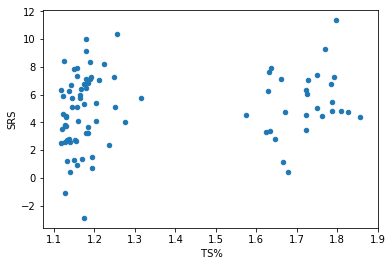

In [34]:
topTS.plot.scatter(x = ' TS%', y = 'SRS')

We are going to analyze what teams are plotted above:

In [35]:
for index, row in topTS.iterrows():
    print (row['TMYR'], row['W'], row['SRS'], row[' TS%'])

ATL11 53.0 4.44 1.13
ATL12 44.0 -1.1 1.127
ATL16 60.0 4.75 1.827
ATL17 48.0 3.49 1.121
BOS10 62.0 7.44 1.749
BOS12 56.0 4.83 1.81
BOS19 55.0 3.23 1.185
BOS9 66.0 9.3 1.771
CHI8 49.0 4.52 1.5750000000000002
CLE16 53.0 4.08 1.16
DAL11 55.0 2.66 1.1549999999999998
DAL2 53.0 4.61 1.1219999999999999
DAL4 60.0 7.9 1.157
DAL7 60.0 5.96 1.164
DAL8 67.0 7.28 1.192
DET6 54.0 3.31 1.624
DET7 64.0 6.24 1.63
DET9 59.0 6.67 1.142
GSW14 47.0 1.32 1.15
GSW16 67.0 10.01 1.178
GSW17 73.0 10.38 1.256
GSW18 67.0 11.35 1.797
GSW19 58.0 5.79 1.315
HOU14 45.0 3.69 1.184
HOU19 65.0 8.21 1.2229999999999999
IND14 49.0 3.34 1.634
IND4 48.0 2.79 1.6469999999999998
LAC13 40.0 2.82 1.138
LAC14 56.0 6.43 1.166
LAC15 57.0 7.27 1.7930000000000001
LAC16 56.0 6.8 1.7850000000000001
LAC17 53.0 4.13 1.2029999999999998
LAC18 51.0 4.42 1.8559999999999999
LAL1 67.0 8.41 1.124
LAL10 65.0 7.11 1.178
LAL11 57.0 4.78 1.6709999999999998
LAL12 57.0 6.01 1.726
LAL2 56.0 3.74 1.126
LAL3 58.0 7.15 1.662
LAL4 50.0 2.71 1.1520000000000

7 out of the last 10 teams who have an NBA chamionship that year are on this list. (GSW19, GSW18, GSW16, MIA13, MIA14, LAL11, LAL10). Having star players who have a high TS% - players who are really good at shooting - on a team seems to be more important than the other player stats. But what about the team wide stats? Do teams with great shooters benefit from other team wide stats more than the shooting percentage of their star players?

In [36]:
x = topTS.corr()['SRS']
x.to_csv('topTSteamstats.csv')
x

 G         0.116470
 PER       0.338198
 TS%       0.170874
 3PAr      0.146253
 FTr       0.124953
 ORB%      0.026830
 DRB%      0.176910
 TRB%      0.158392
 AST%      0.188024
 STL%      0.118691
 BLK%      0.099187
 TOV%      0.100697
 USG%      0.254693
 OWS       0.356682
 DWS       0.377016
 WS        0.487341
 WS/48     0.537307
 OBPM      0.323470
 DBPM      0.266121
 BPM       0.551290
 VORP      0.500190
oRk       -0.210673
G_x        0.043685
MP_x      -0.191360
oFG       -0.065331
oFGA       0.186331
oFG%      -0.452567
o3P       -0.099005
o3PA      -0.034186
o3P%      -0.399318
             ...   
TRB        0.199152
AST        0.278263
STL        0.112483
BLK        0.366532
TOV       -0.116448
PF        -0.227358
PTS        0.356609
Age        0.226968
W          0.874666
L         -0.882889
PW         0.959107
PL        -0.970567
MOV        0.992233
SOS       -0.211213
SRS        1.000000
ORtg       0.507260
DRtg      -0.433160
Pace       0.147560
FTr        0.059027


The team TS% (listed above eFG% and below 3PAr) is moderately correleated with the SRS for these teams. We will investigate this further by looking at teams in the 75th percentile of team TS%:

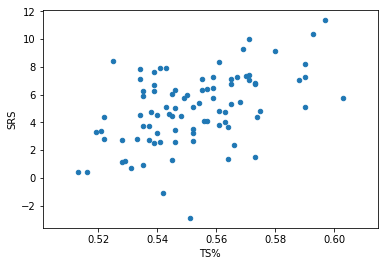

In [37]:
topTS.plot.scatter(x = 'TS%', y = 'SRS') #TS% over here refers to the team wide TS%, NOT the TS% of the star players

In [38]:
p = np.percentile(topTS['TS%'], 75) # again, 'TS% refers to the team wide TS%'

x = topTS[topTS['TS%'] >= p]
print("mean: ", x['SRS'].mean())
for index, row in x.iterrows():
    print (row['TMYR'], row['W'], row['SRS'], row['TS%'])

mean:  6.83875
BOS10 62.0 7.44 0.571
BOS9 66.0 9.3 0.569
GSW16 67.0 10.01 0.571
GSW17 73.0 10.38 0.593
GSW18 67.0 11.35 0.597
GSW19 58.0 5.79 0.603
HOU19 65.0 8.21 0.59
LAC15 57.0 7.27 0.567
LAC16 56.0 6.8 0.565
LAC18 51.0 4.42 0.574
LAL9 57.0 7.34 0.57
MIA12 58.0 6.76 0.573
MIA14 66.0 7.03 0.588
MIN19 47.0 2.35 0.566
NOP19 48.0 1.48 0.573
OKC14 60.0 9.15 0.58
OKC17 55.0 7.09 0.565
ORL9 52.0 4.79 0.575
PHO6 62.0 7.08 0.571
PHO7 54.0 5.48 0.568
PHO8 61.0 7.28 0.59
PHO9 55.0 5.14 0.59
UTA11 53.0 5.33 0.565
UTA9 54.0 6.86 0.573


4 teams (GSW19, GSW18, GSW16, MIA14) that have won NBA championships in the last 10 years appear here again, and the average team SRS rating is 6.8. This suggests that teams with stars who are great at shooting generally benefit from being great at shooting overall, across all players on the team. 

We will now look at the relationship between team wide statistics and the SRS rating of a team

In [39]:
allTeamsCorrs = allTeams.corr()['SRS']
allTeamsCorrs.to_csv('allTeamsCorrs1.csv')
allTeamsCorrs


oRk       -0.532371
G_x       -0.000181
MP_x      -0.034672
oFG       -0.335167
oFGA       0.019263
oFG%      -0.600366
o3P       -0.128588
o3PA      -0.054316
o3P%      -0.454784
o2P       -0.284023
o2PA       0.078940
o2P%      -0.479679
oFT       -0.284346
oFTA      -0.260493
oFT%      -0.127120
oORB      -0.062620
oDRB      -0.290639
oTRB      -0.315273
oAST      -0.511497
oSTL      -0.270042
oBLK      -0.432016
oTOV       0.069604
oPF        0.141984
oPTS      -0.406248
Rk_x      -0.510599
G_y       -0.000181
MP_y      -0.034672
FG         0.338684
FGA       -0.079078
FG%        0.599816
             ...   
TRB        0.268663
AST        0.381879
STL        0.154848
BLK        0.271394
TOV       -0.344197
PF        -0.223336
PTS        0.407353
Age        0.483883
W          0.919663
L         -0.919685
PW         0.943667
PL        -0.941386
MOV        0.996195
SOS       -0.241646
SRS        1.000000
ORtg       0.678707
DRtg      -0.613110
Pace      -0.050270
FTr        0.134516


It appears that team TS%, opponent FG%, FG%, effective FG%, opponent effective FG%, opponent assists per game, and age. Team TS%, FG%, and effective FG% are very similar statistics, so we'll use FG% because it has the highest correleation to SRS. Opponent effective FG% and opponent FG% are very similar too, and we'll use opponent FG% because it has the higher correleation to SRS. These stats have negative correleation, which make sense because the less percentage of basket attempts your opponent scores, the better your team should theoretically do. Interestingly, a team's points per game is not significantly correleated with the SRS score, indicating that teams must be efficient in shooting the ball (The field goal percentage measures this). Finally, we'll look at the opponent assists per game stat.

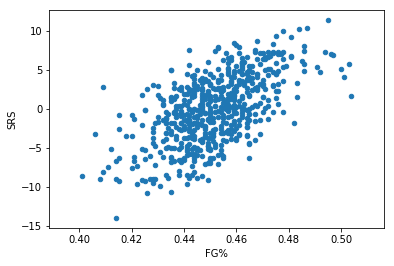

In [40]:
allTeams.plot.scatter(x = 'FG%', y = 'SRS')

We'll define teams in the 75th percentile of a stat as being 'good' at that statistic. Let's look at teams in the top 75th percentile of FG% to better understand the data.  

In [67]:

topFG = np.percentile(allTeams['FG%'], 75)
topTeamFG = allTeams[allTeams['FG%'] >= topFG]

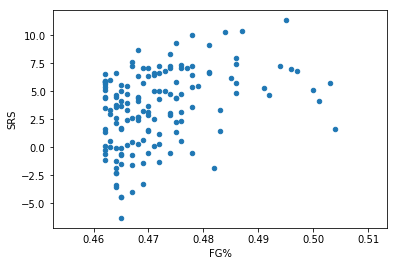

In [68]:
topTeamFG.plot.scatter(x = 'FG%', y = 'SRS')

In [76]:
print("mean: ", topTeamFG['SRS'].mean())
print("standard deviation: ", topTeamFG['SRS'].std())

mean:  3.5020805369127515
standard deviation:  3.4403702808194434


The mean SRS score for teams with high FG% is lower than the mean SRS score for teams with star shooting players as discussed above, but it is still moderately high. We will look at what factors are most correleated with the SRS score for these teams. 

In [94]:
ttfg = topTeamFG.corr()['SRS']
ttfg.to_csv('ttfg.csv')
ttfg

oRk       -0.466593
G_x       -0.039926
MP_x      -0.242466
oFG       -0.350767
oFGA       0.018641
oFG%      -0.649946
o3P       -0.271974
o3PA      -0.194092
o3P%      -0.537780
o2P       -0.157206
o2PA       0.248449
o2P%      -0.560335
oFT       -0.251710
oFTA      -0.220954
oFT%      -0.145837
oORB      -0.015107
oDRB      -0.196486
oTRB      -0.184257
oAST      -0.468273
oSTL      -0.122840
oBLK      -0.325786
oTOV      -0.046824
oPF       -0.002072
oPTS      -0.454584
Rk_x      -0.305800
G_y       -0.039926
MP_y      -0.242466
FG         0.119255
FGA       -0.054348
FG%        0.380360
             ...   
TRB        0.398154
AST        0.230798
STL        0.130059
BLK        0.385344
TOV       -0.187371
PF        -0.205858
PTS        0.209101
Age        0.313149
W          0.899305
L         -0.920952
PW         0.939755
PL        -0.966151
MOV        0.995416
SOS       -0.160934
SRS        1.000000
ORtg       0.520704
DRtg      -0.685164
Pace      -0.068448
FTr        0.035090


The SRS of teams with high FG% is most strongly correleated with opponent field goal percentage (oFG%). This makes sense - teams who are good at scoring also need to be good at stopping other teams from scoring. 

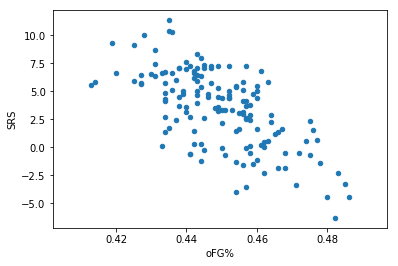

In [93]:
topTeamFG.plot.scatter(x = 'oFG%', y = 'SRS')

Now let's find teams in the 25% of opposing field goal percentage (a smaller number of oFG% is better, as that means less points scored for 

In [96]:
oFGp_lower = np.percentile(topTeamFG['oFG%'], 0)
oFGp_upper = np.percentile(topTeamFG['oFG%'], 25)

topTeamOFG = topTeamFG[(topTeamFG['oFG%'] >= oFGp_lower) & (topTeamFG['oFG%'] <= oFGp_upper)]

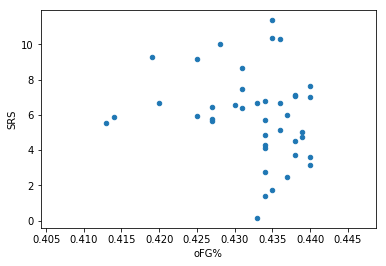

In [97]:
topTeamOFG.plot.scatter(x = 'oFG%', y = 'SRS')

In [98]:
print("mean: ", topTeamOFG['SRS'].mean())
print("standard deviation: ", topTeamOFG['SRS'].std())
print("\n")

for index, row in topTeamOFG.iterrows():
    print(row['TMYR'], row['SRS'], row['oFG%'], row['W'])

mean:  5.943902439024391
standard deviation:  2.5000208779616027


UTA0 5.54 0.413 37.0
HOU0 1.39 0.434 31.0
SAS1 5.92 0.425 53.0
POR1 6.36 0.431 59.0
POR2 4.52 0.43799999999999994 50.0
UTA2 5.0 0.439 53.0
LAL2 3.74 0.43799999999999994 56.0
SAC3 7.61 0.44 61.0
SAS4 5.65 0.42700000000000005 60.0
UTA4 2.76 0.434 47.0
SAC4 6.68 0.42 59.0
MIN4 2.46 0.43700000000000006 51.0
MIN5 5.86 0.414 58.0
MIA6 5.77 0.42700000000000005 59.0
SAS7 6.69 0.433 63.0
LAC7 1.75 0.435 47.0
MIA7 3.59 0.44 52.0
BOS9 9.3 0.419 66.0
CLE10 8.68 0.431 66.0
BOS10 7.44 0.431 62.0
DEN10 3.13 0.44 54.0
ORL11 7.12 0.43799999999999994 59.0
BOS12 4.83 0.434 56.0
CHI12 6.53 0.43 62.0
MIA12 6.76 0.434 58.0
LAL12 6.01 0.43700000000000006 57.0
MIA13 5.72 0.434 46.0
OKC13 6.44 0.42700000000000005 47.0
MIA14 7.03 0.44 66.0
OKC14 9.15 0.425 60.0
GSW15 5.15 0.436 51.0
OKC15 6.66 0.436 59.0
ATL16 4.75 0.439 60.0
WAS16 0.17 0.433 46.0
GSW16 10.01 0.428 67.0
SAS17 10.28 0.436 67.0
LAC17 4.13 0.434 53.0
OKC17 7.09 0.43799999999999994 

The mean SRS rating is significantly higher for these teams, and the standard deviation is lower. 8 teams on this list went on to win NBA championships, indicating that teams with high field goal percentage should also be good at stopping the other teams from having a high field goal percentage. We will now look at opponent assists per game. 

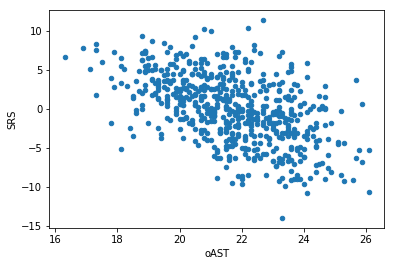

In [106]:
allTeams.plot.scatter(x = 'oAST', y = 'SRS')

In [107]:
lower_bound = np.percentile(allTeams['oAST'], 0)
upper_bound = np.percentile(allTeams['oAST'], 25)

bestAst = allTeams[(allTeams['oAST'] >= lower_bound) & (allTeams['oAST'] <= upper_bound)]

In [108]:
print("mean: ", bestAst['SRS'].mean())
print("standard deviation: ", bestAst['SRS'].std())

mean:  3.004370860927153
standard deviation:  3.0446951847782597


This is lower than the mean SRS rating for teams in the 75th percentile of field goal percentage. We will see what factors are correleated with opposing team assists per game and try to adjust:

In [109]:
x = bestAst.corr()['SRS']
x.to_csv('bestAst.csv')
x

oRk       -0.193282
G_x        0.001565
MP_x      -0.218704
oFG        0.092380
oFGA       0.315000
oFG%      -0.258164
o3P       -0.133702
o3PA      -0.086223
o3P%      -0.254064
o2P        0.208063
o2PA       0.345524
o2P%      -0.230814
oFT       -0.392326
oFTA      -0.392574
oFT%      -0.030932
oORB       0.044340
oDRB      -0.209687
oTRB      -0.174521
oAST      -0.226316
oSTL      -0.080037
oBLK      -0.269454
oTOV      -0.056372
oPF        0.077673
oPTS      -0.144918
Rk_x      -0.588687
G_y        0.001565
MP_y      -0.218704
FG         0.428729
FGA        0.010660
FG%        0.584488
             ...   
TRB        0.255732
AST        0.320941
STL        0.006326
BLK        0.301197
TOV       -0.181120
PF        -0.386498
PTS        0.514137
Age        0.233714
W          0.773832
L         -0.865633
PW         0.827822
PL        -0.901705
MOV        0.992221
SOS       -0.127699
SRS        1.000000
ORtg       0.640760
DRtg      -0.354634
Pace       0.174642
FTr        0.172499


It seems like TS% is most strongly correleated with opposing team assists per game, indicating that teams who don't let other teams pass the ball must also be good at shooting. Finally, we'll explore statistcal trends over 20 years for all basketball teams. 

Let's look at how the statistics of 3PAr and Pace have changed over the years:

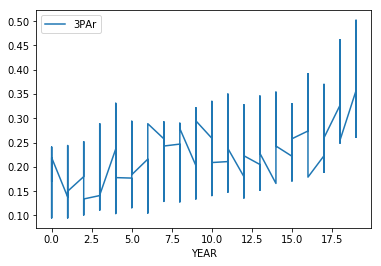

In [110]:
allTeams.plot(x = 'YEAR', y = '3PAr')

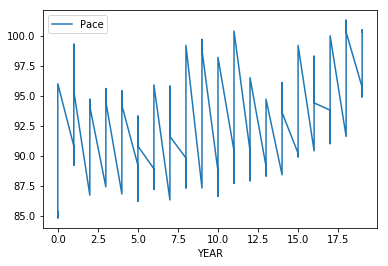

In [111]:
allTeams.plot(x = 'YEAR', y = 'Pace')

We can see that both of these stats (especially 3PAr) have gone upward over the years, which mirrors popular opinion that NBA nowawayds move faster and shoot more 3 pointers. 

# Summary of Analysis

We can see from the data that NBA teams should get stars who are good at making their shots, as indicated by the TS% statistic. However, teams should more importantly be good at making their shots on aggregate, and teams should be good at defending shots on aggregate. This is evident from having many high-performing teams fitting in these categories. So, shooting percentage appears to be the most important factor correleated with a team's rating/number of wins. 